In [2]:
%load_ext dotenv
%dotenv
from decouple import config

ClientID = config('ClientID')
PASSWORD = config('PASSWORD')
AppType = config('AppType')
APIKey = config('APIKey')
SecretKey = config('SecretKey')


# package import statement
from smartapi import SmartConnect #or from smartapi.smartConnect import SmartConnect
# import smartapi.smartExceptions(for smartExceptions)

#create object of call
obj=SmartConnect(api_key=APIKey)

#login api call

data = obj.generateSession(ClientID,PASSWORD)
refreshToken= data['data']['refreshToken']

def fetch_the_feedtoken(obj):
    feedToken=obj.getfeedToken()
    return feedToken

def fetch_User_Profile(obj):
    userProfile= obj.getProfile(refreshToken)
    return userProfile

def place_order(obj):
    try:
        orderparams = {
            "variety": "NORMAL",
            "tradingsymbol": "SBIN-EQ",
            "symboltoken": "3045",
            "transactiontype": "BUY",
            "exchange": "NSE",
            "ordertype": "LIMIT",
            "producttype": "INTRADAY",
            "duration": "DAY",
            "price": "19500",
            "squareoff": "0",
            "stoploss": "0",
            "quantity": "1"
            }
        orderId=obj.placeOrder(orderparams)
        print("The order id is: {}".format(orderId))
    except Exception as e:
        print("Order placement failed: {}".format(e.message))
    return orderId,orderparams

def gtt_rule_creation():
    try:
        gttCreateParams={
                "tradingsymbol" : "SBIN-EQ",
                "symboltoken" : "3045",
                "exchange" : "NSE", 
                "producttype" : "MARGIN",
                "transactiontype" : "BUY",
                "price" : 100000,
                "qty" : 10,
                "disclosedqty": 10,
                "triggerprice" : 200000,
                "timeperiod" : 365
            }
        rule_id=obj.gttCreateRule(gttCreateParams)
        print("The GTT rule id is: {}".format(rule_id))
    except Exception as e:
        print("GTT Rule creation failed: {}".format(e.message))
    
def gtt_rule_list():
    try:
        status=["FORALL"] #should be a list
        page=1
        count=10
        lists=obj.gttLists(status,page,count)
    except Exception as e:
        print("GTT Rule List failed: {}".format(e.message))

def hist_data(obj):
    try:
        historicParam={
        "exchange": "NSE",
        "symboltoken": "3045",
        "interval": "ONE_MINUTE",
        "fromdate": "2021-02-08 09:00", 
        "todate": "2021-02-08 09:16"
        }
        hist_data=obj.getCandleData(historicParam)
    except Exception as e:
        print("Historic Api failed: {}".format(e.message))
    return hist_data

def logout():
    try:
        logout=obj.terminateSession('Your Client Id')
        print("Logout Successfull")
    except Exception as e:
        print("Logout failed: {}".format(e.message))



def webSocket():
    from smartapi import SmartWebSocket
    from smartapi import SmartConnect
    api_key_ws='i3XAxezI'
    obj_ws= SmartConnect(api_key=api_key_ws)
    FEED_TOKEN= fetch_the_feedtoken(obj_ws)
    CLIENT_CODE=ClientID
    token="nse_cm|2885" #"nse_cm|2885&nse_cm|1594&nse_cm|11536"
    task="mw" #"mw"|"sfi"|"dp"
    return SmartWebSocket(FEED_TOKEN, CLIENT_CODE)

def on_tick(ws, tick):
    print("Ticks: {}".format(tick))

def on_connect(ws, response):
    ws.websocket_connection() # Websocket connection  
    ws.send_request(token,task) 
    
def on_close(ws, code, reason):
    ws.stop()

# Assign the callbacks.
# ss.on_ticks = on_tick
# ss.on_connect = on_connect
# ss.on_close = on_close

# ss.connect()
import  json
data=hist_data(obj)

# data =json.dumps(Historic_api(obj))
print(data)


{'status': True, 'message': 'SUCCESS', 'errorcode': '', 'data': [['2021-02-08T09:15:00+05:30', 398.0, 403.45, 397.3, 401.85, 2609877], ['2021-02-08T09:16:00+05:30', 402.15, 403.0, 401.45, 401.75, 1470752]]}


__on_open################
{'task': 'cn', 'channel': 'NONLM', 'token': '0951090183', 'user': 'A617967', 'acctid': 'A617967'}
2021-08-11 07:45:16.065511 : Start task in the backgroundon open

{'task': 'hb', 'channel': '', 'token': '0951090183', 'user': 'A617967', 'acctid': 'A617967'}
Ticks: [{'ak': 'ok', 'msg': 'connected', 'task': 'cn'}]
Ticks: [{'ak': 'ok', 'msg': 'mw', 'task': 'mw'}]
Ticks: [{'ak': 'ok', 'msg': 'heartbeat', 'task': 'hb'}]
2021-08-11 07:45:46.074379 : Start task in the background
{'task': 'hb', 'channel': '', 'token': '0951090183', 'user': 'A617967', 'acctid': 'A617967'}
Ticks: [{'ak': 'ok', 'msg': 'heartbeat', 'task': 'hb'}]
2021-08-11 07:46:16.077508 : Start task in the background
{'task': 'hb', 'channel': '', 'token': '0951090183', 'user': 'A617967', 'acctid': 'A617967'}
Ticks: [{'ak': 'ok', 'msg': 'heartbeat', 'task': 'hb'}]
Ticks: [{'name': 'tm', 'tvalue': '11/08/2021 07:46:27'}]
2021-08-11 07:46:46.079728 : Start task in the background
{'task': 'hb', 'channel': '

In [448]:
ws.connect()

Error info: Handshake status 503 Service Unavailable
Error info: __on_close() takes 2 positional arguments but 4 were given


In [11]:
def hist_data(obj):
    try:
        historicParam={
        "exchange": "NSE",
        "symboltoken": "3045",
        "interval": "ONE_MINUTE",
        "fromdate": "2021-02-08 09:00", 
        "todate": "2021-02-08 09:16"
        }
        hist_data=obj.getCandleData(historicParam)
    except Exception as e:
        print("Historic Api failed: {}".format(e.message))
    return hist_data

In [12]:
hist_data(obj)

{'status': True,
 'message': 'SUCCESS',
 'errorcode': '',
 'data': [['2021-02-08T09:15:00+05:30', 398.0, 403.45, 397.3, 401.85, 2609877],
  ['2021-02-08T09:16:00+05:30', 402.15, 403.0, 401.45, 401.75, 1470752]]}

In [118]:
import datetime ,time
from datetime import datetime,timedelta
def hist_data(obj,symboltoken,for_days):
    todate=datetime.today().isoformat(sep=' ',timespec='minutes')
    fromdate= datetime.now()
    back_for_days= timedelta(days=3,hours=0,minutes=0)
    fromdate=fromdate-back_for_days
    print(f)
#     back_for_days= timedelta(days=3,hours=0,minutes=0)
#     fromdate=todate-back_for_days
#     print(fromdate)
    print(back_for_days)
    try:
        historicParam={
        "exchange": "NSE",
        "symboltoken": "3045",
        "interval": "ONE_MINUTE",
        "fromdate": fromdate.isoformat(sep=' ',timespec='minutes'), 
        "todate": todate
        }
        hist_data=obj.getCandleData(historicParam)
    except Exception as e:
        print("Historic Api failed: {}".format(e.message))
    return hist_data

In [87]:
from datetime import datetime,date
fromdate= datetime.now().isoformat(sep=' ',timespec='minutes') 


In [61]:
print(fromdate)


2021-08-08 10:41


In [113]:
from datetime import datetime,date
fromdate= datetime.now()
back_for_days= timedelta(days=3,hours=0,minutes=0)
f=fromdate-back_for_days


In [108]:
print(f)

2021-08-05 11:20:43.094476


In [427]:
import datetime ,time,pandas as pd
from datetime import datetime,timedelta
def hist_data(obj,for_days,symboltoken="3045",exchange="NSE",interval="ONE_MINUTE"):
    todate=datetime.today().isoformat(sep=' ',timespec='minutes')
    fromdate= datetime.now()
    back_for_days= timedelta(days=for_days,hours=0,minutes=0)
    fromdate=fromdate-back_for_days
    print(f)
#     back_for_days= timedelta(days=3,hours=0,minutes=0)
#     fromdate=todate-back_for_days
#     print(fromdate)
    print(back_for_days)
    try:
        historicParam={
        "exchange": exchange,
        "symboltoken": symboltoken,
        "interval": interval,
        "fromdate": fromdate.isoformat(sep=' ',timespec='minutes'), 
        "todate": todate
        }
        print(historicParam)
        hist_data=obj.getCandleData(historicParam)
        
    except Exception as e:
        print("Historic Api failed: {}".format(e.message))
    return hist_data

In [428]:
import pandas as pd
equities= pd.read_json('https://margincalculator.angelbroking.com/OpenAPI_File/files/OpenAPIScripMaster.json')
havells= equities[equities['symbol'].str.contains("HAVELLS-EQ",case=False)]
symboltoken=havells['token'].iloc[-1]
hist=hist_data(obj,5,symboltoken)
print(hist)
data= hist['data']
# converting into dataframe
hist_df=pd.DataFrame(data)
data=hist_df.rename(columns={0:"timestamp",1: "open", 2:"high",3: "low", 4:"close",5: "volume"})


2021-08-05 11:22:16.864452
5 days, 0:00:00
{'exchange': 'NSE', 'symboltoken': '9819', 'interval': 'ONE_MINUTE', 'fromdate': '2021-08-04 07:56', 'todate': '2021-08-09 07:56'}
{'status': True, 'message': 'SUCCESS', 'errorcode': '', 'data': [['2021-08-04T09:15:00+05:30', 1241.9, 1241.9, 1235.0, 1235.9, 38854], ['2021-08-04T09:16:00+05:30', 1235.75, 1239.7, 1235.75, 1236.4, 31555], ['2021-08-04T09:17:00+05:30', 1237.45, 1238.9, 1236.25, 1237.4, 19955], ['2021-08-04T09:18:00+05:30', 1237.4, 1239.3, 1235.2, 1238.9, 13780], ['2021-08-04T09:19:00+05:30', 1238.9, 1239.3, 1236.0, 1236.95, 12413], ['2021-08-04T09:20:00+05:30', 1236.85, 1238.0, 1233.1, 1234.0, 20860], ['2021-08-04T09:21:00+05:30', 1234.2, 1235.0, 1232.05, 1235.0, 9620], ['2021-08-04T09:22:00+05:30', 1234.0, 1234.9, 1231.8, 1234.45, 24883], ['2021-08-04T09:23:00+05:30', 1234.5, 1234.95, 1233.0, 1233.15, 8667], ['2021-08-04T09:24:00+05:30', 1233.15, 1234.45, 1232.8, 1233.1, 10047], ['2021-08-04T09:25:00+05:30', 1233.1, 1233.1, 1232.

In [421]:
#calling talib 
#for buying
from talib.abstract import *
data['ema']=talib.EMA(data['close'],timeperiod=50)
data['rsi']=talib.RSI(data['close'],timeperiod=50)
data['atr']=talib.ATR(data['high'],data['low'],data['close'],timeperiod=50)
data['cross_up']=data['cross_down']=data['rsi_up']=0

if data['open'].iloc[-1]-data['ema'].iloc[-1]<1:
    print("hey is good to buy")
# df.where(df['cross_up']==1 ).head(100)
df.head(100)

hey is good to buy


,timestamp,open,high,low,close,volume,ema,rsi,atr,cross_up,cross_down,rsi_up
0,2021-07-12T09:15:00+05:30,1026.20,1032.00,1020.15,1030.30,6602,NaN,NaN,NaN,0,0,0
1,2021-07-12T09:16:00+05:30,1028.35,1030.00,1028.35,1029.90,2375,NaN,NaN,NaN,0,0,0
2,2021-07-12T09:17:00+05:30,1029.00,1033.15,1029.00,1031.25,5379,NaN,NaN,NaN,0,0,0
3,2021-07-12T09:18:00+05:30,1031.05,1032.95,1030.35,1031.85,3791,NaN,NaN,NaN,0,0,0
4,2021-07-12T09:19:00+05:30,1032.65,1033.95,1031.65,1032.95,5149,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-07-12T10:50:00+05:30,1038.65,1038.85,1038.30,1038.65,830,1036.91,56.40,1.37,0,0,1
96,2021-07-12T10:51:00+05:30,1038.65,1039.00,1038.65,1039.00,862,1036.99,56.81,1.35,0,0,1
97,2021-07-12T10:52:00+05:30,1038.85,1039.40,1038.85,1039.40,903,1037.09,57.28,1.34,0,0,1
98,2021-07-12T10:53:00+05:30,1039.40,1039.85,1039.15,1039.80,802,1037.19,57.75,1.32,0,0,1


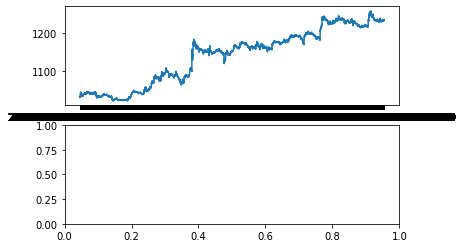

In [418]:
import matplotlib.pyplot as plt
# Plot the closing prices for `aapl`
fig, axs = plt.subplots(2, 1)
axs[0].plot(df['timestamp'],df['close'])
axs[0].grid=True
# Show the plot
plt.show()

In [422]:
df=data.round(decimals=2)
# df= df.filter(df['ema'].notnull)
len(df)
# df.tail()
for i in range(20,len(df)):
    if df['close'][i-1] <= df['ema'][i-1] and df['close'][i]>df['ema'][i]  :
        df['cross_up'][i]=1
    if df['close'][i-1]>=df['ema'][i-1] and df['close'][i]<df['ema'][i] :
        df['cross_down'][i]=1
    if df['rsi'][i] >=50:
        df['rsi_up'][i]=1
        
# df.tail()
count=0
for i in range(20,len(df)):
    if df['cross_up'][i]-df['rsi_up'][i] ==0:
        count=count+1
        print("hey is df['open']={} and df['close']=={} df['ema'][i] = {} df['rsi'][i] ={} df['timestamp'][i] ={} tran {} and count is {}".format(df['open'][i],df['close'][i],df['ema'][i],df['rsi'][i],df['timestamp'][i],i,count))

D:\Users\W7146644\AppData\Local\Temp\1/ipykernel_2324/1330736317.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi_up'][i]=1
D:\Users\W7146644\AppData\Local\Temp\1/ipykernel_2324/1330736317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross_down'][i]=1
D:\Users\W7146644\AppData\Local\Temp\1/ipykernel_2324/1330736317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross_up'][i]=1


hey is df['open']=1233.05 and df['close']==1233.8 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:35:00+05:30 tran 20 and count is 1
hey is df['open']=1233.8 and df['close']==1234.2 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:36:00+05:30 tran 21 and count is 2
hey is df['open']=1233.9 and df['close']==1233.15 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:37:00+05:30 tran 22 and count is 3
hey is df['open']=1233.2 and df['close']==1232.3 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:38:00+05:30 tran 23 and count is 4
hey is df['open']=1232.0 and df['close']==1232.2 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:39:00+05:30 tran 24 and count is 5
hey is df['open']=1231.9 and df['close']==1233.25 df['ema'][i] = nan df['rsi'][i] =nan df['timestamp'][i] =2021-08-04T09:40:00+05:30 tran 25 and count is 6
hey is df['open']=1233.45 and df['close']==1233.5 df['ema'][i] = na

In [400]:
df.filter(df['ema'][i] !='nan')

TypeError: 'bool' object is not iterable

In [366]:
data['open'].iloc[-1]-data['ema'].iloc[-1]

-0.6769037050501083

In [266]:
if data['open'].iloc[-1]-data['ema'].iloc[-1]<1:
    print("hey is good to buy")
    

In [334]:
havells= json_data[json_data['symbol'].str.contains("HAVELLS-EQ",case=False)]
havells.head()

,token,symbol,name,expiry,strike,lotsize,instrumenttype,exch_seg,tick_size
6311,9819,HAVELLS-EQ,HAVELLS,,-1,1,,NSE,5


In [317]:
# names=json_data.filter(like='M') # this is for labels only 
continents = ['M&MFIN','HA', 'Americas', 'Europe']
names= json_data[(json_data.name.isin(continents))]

In [318]:
# names.where(lambda x: x.concate("ad"))
names.head(12)

,token,symbol,name,expiry,strike,lotsize,instrumenttype,exch_seg,tick_size
0,13287,M&MFIN-BL,M&MFIN,,-1,1,,NSE,5
1345,20050,M&MFIN-N3,M&MFIN,,-1,1,,NSE,1
4184,13285,M&MFIN-EQ,M&MFIN,,-1,1,,NSE,5
5273,20048,M&MFIN-N2,M&MFIN,,-1,1,,NSE,1
6802,20046,M&MFIN-N1,M&MFIN,,-1,1,,NSE,1
12873,532720,M&MFIN,M&MFIN,,-1,1,,BSE,5
19362,96450,M&MFIN28OCT21220PE,M&MFIN,28OCT2021,22000,4000,OPTSTK,NFO,5
19431,88122,M&MFIN26AUG21125CE,M&MFIN,26AUG2021,12500,4000,OPTSTK,NFO,5
19442,107341,M&MFIN30SEP21145PE,M&MFIN,30SEP2021,14500,4000,OPTSTK,NFO,5
19765,96406,M&MFIN28OCT21110PE,M&MFIN,28OCT2021,11000,4000,OPTSTK,NFO,5


In [341]:
names= json_data[json_data['name'].str.contains("have",case=False)]
names['symboltoken'].iloc[-1]

KeyError: 'symboltoken'

In [ ]:
# 

In [329]:
names= json_data.loc[json_data['name'].str.contains("HAVELLS \w{1,}/",case=False)] # regex can be used later
names.head()

,token,symbol,name,expiry,strike,lotsize,instrumenttype,exch_seg,tick_size


In [339]:
names['symboltoken'].iloc(-1)

KeyError: 'symboltoken'